In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
adult_columns = [
    "Age",
    "Workclass",
    "final weight",
    "Education",
    "Education-Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Ethnic group",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours per week",
    "Country",
    "Income",
]

## Download Data

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                 header = None, names = adult_columns)
df.head()

,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Exploration and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   final weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Ethnic group    32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Numerical features analysis

In [17]:
numerical_features_df = df[['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week', 'final weight']]
numerical_features_df.describe()

,Age,Education-Num,Capital Gain,Capital Loss,Hours per week,final weight
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,1.897784e+05
std,13.640433,2.572720,7385.292085,402.960219,12.347429,1.055500e+05
min,17.000000,1.000000,0.000000,0.000000,1.000000,1.228500e+04
25%,28.000000,9.000000,0.000000,0.000000,40.000000,1.178270e+05
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.783560e+05
75%,48.000000,12.000000,0.000000,0.000000,45.000000,2.370510e+05
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.484705e+06


Let's see the **correlations** between numerical variables

<Axes: >

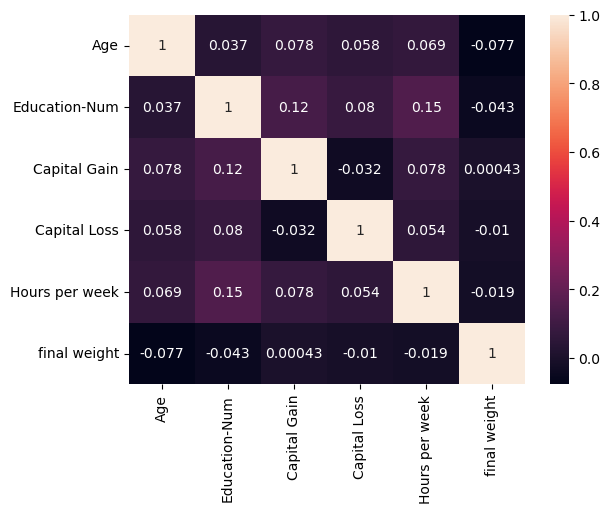

In [7]:
corr_matrix = numerical_features_df.corr()
sns.heatmap(corr_matrix, annot = True)

There is no signifacant correlation between numerical variables. Lets now check the **distribution** of these variables

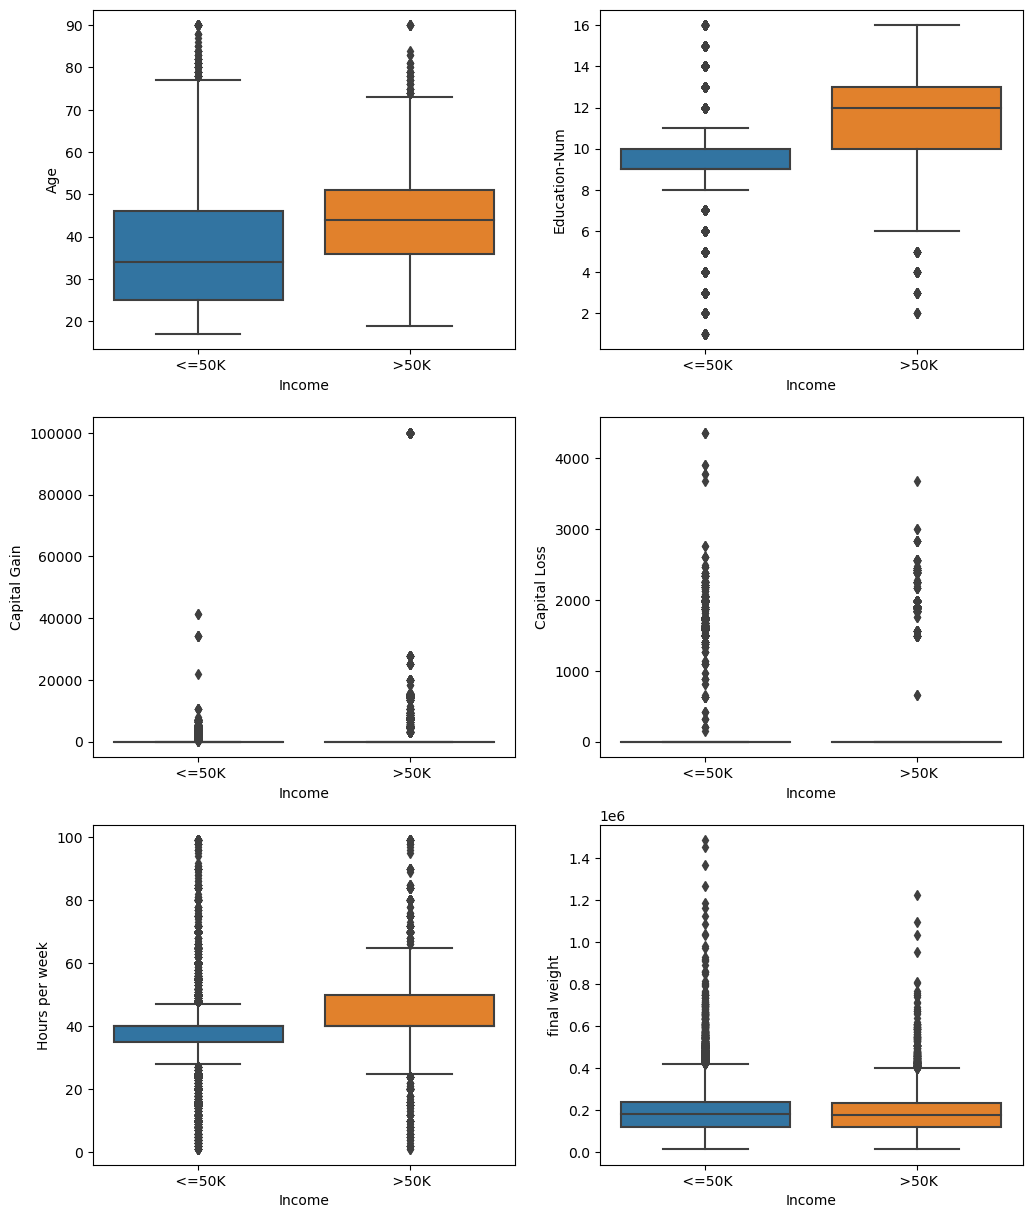

In [8]:
fig, axes = plt.subplots(3, 2, figsize = (12,15))

for i, col in enumerate(list(numerical_features_df.columns.values)):
    sns.boxplot(x = df['Income'], y = df[col], ax=axes.flatten()[i])

'Capital Gain' and 'Capital Loss' features have huge variances and the line at the botton of both plots says that most of their values are equeal to 0. In this case we can apply *log* function, but need to shift it (because of 0)

In [9]:
df['Capital Gain'] = np.log(1+ df['Capital Gain'])
df['Capital Loss'] = np.log(1+ df['Capital Loss'])

<Axes: xlabel='Income', ylabel='Capital Gain'>

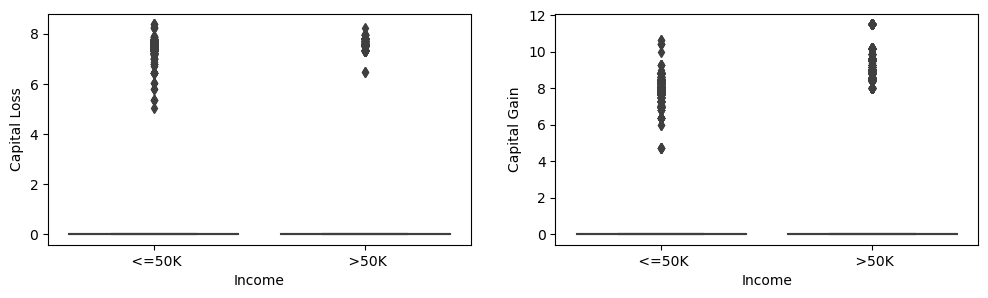

In [10]:
fix, axes = plt.subplots(1,2, figsize=(12,3))
sns.boxplot(ax = axes[0], x = df['Income'], y = df['Capital Loss'])
sns.boxplot(ax = axes[1], x = df['Income'], y = df['Capital Gain'])

## t-test

Since our target variable is binary, we can apply the t-test to determine statistically significant numerical variables. For t-test we also need to know, if the variances of 2 groups are the same. Lavene test can do that:

In [11]:
for col in numerical_features_df:
    over50k = df.loc[lambda x:x['Income'] == ' >50K', col]
    under50k = df.loc[lambda x: x['Income'] == ' <=50K', col]
    (statistic, p_value) = stats.levene(over50k, under50k, center='median')
    print(f'{col}\n variances have siginificant difference: {p_value<0.05}\n')

Age
 variances have siginificant difference: True

Education-Num
 variances have siginificant difference: True

Capital Gain
 variances have siginificant difference: True

Capital Loss
 variances have siginificant difference: True

Hours per week
 variances have siginificant difference: True

final weight
 variances have siginificant difference: True



As **variances** of all variables, divided into 2 groups on the basis of 'Income' parameter, are **not equal**, we'll set this as a perameter to t-test function:

In [12]:
for col in numerical_features_df:
    over50k = df.loc[lambda x:x['Income'] == ' >50K', col]
    under50k = df.loc[lambda x: x['Income'] == ' <=50K', col]
    (t_value, p_value) = stats.ttest_ind(over50k, under50k, equal_var = False)
    print(f'{col}: \nt-value = {t_value}\np-value = {p_value}')
    print(f'Statistically significant: {p_value<0.05}\n')

Age: 
t-value = 50.264210024707836
p-value = 0.0
Statistically significant: True

Education-Num: 
t-value = 64.89601883358671
p-value = 0.0
Statistically significant: True

Capital Gain: 
t-value = 37.229088902525554
p-value = 1.1117739074613902e-281
Statistically significant: True

Capital Loss: 
t-value = 19.530396251843065
p-value = 2.6064299858114486e-83
Statistically significant: True

Hours per week: 
t-value = 45.123095093109875
p-value = 0.0
Statistically significant: True

final weight: 
t-value = -1.7412056101999103
p-value = 0.08167013125422204
Statistically significant: False



According to the p-value there is only one **insignificant** feature - **final weight**.

In [13]:
df['Capital Gain'] = np.exp(df['Capital Gain'])-1
df['Capital Loss'] = np.exp(df['Capital Loss'])-1
df.head()

,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K


## Outliers investigation

Let's check the **distribution** of the **numerical** independent variables

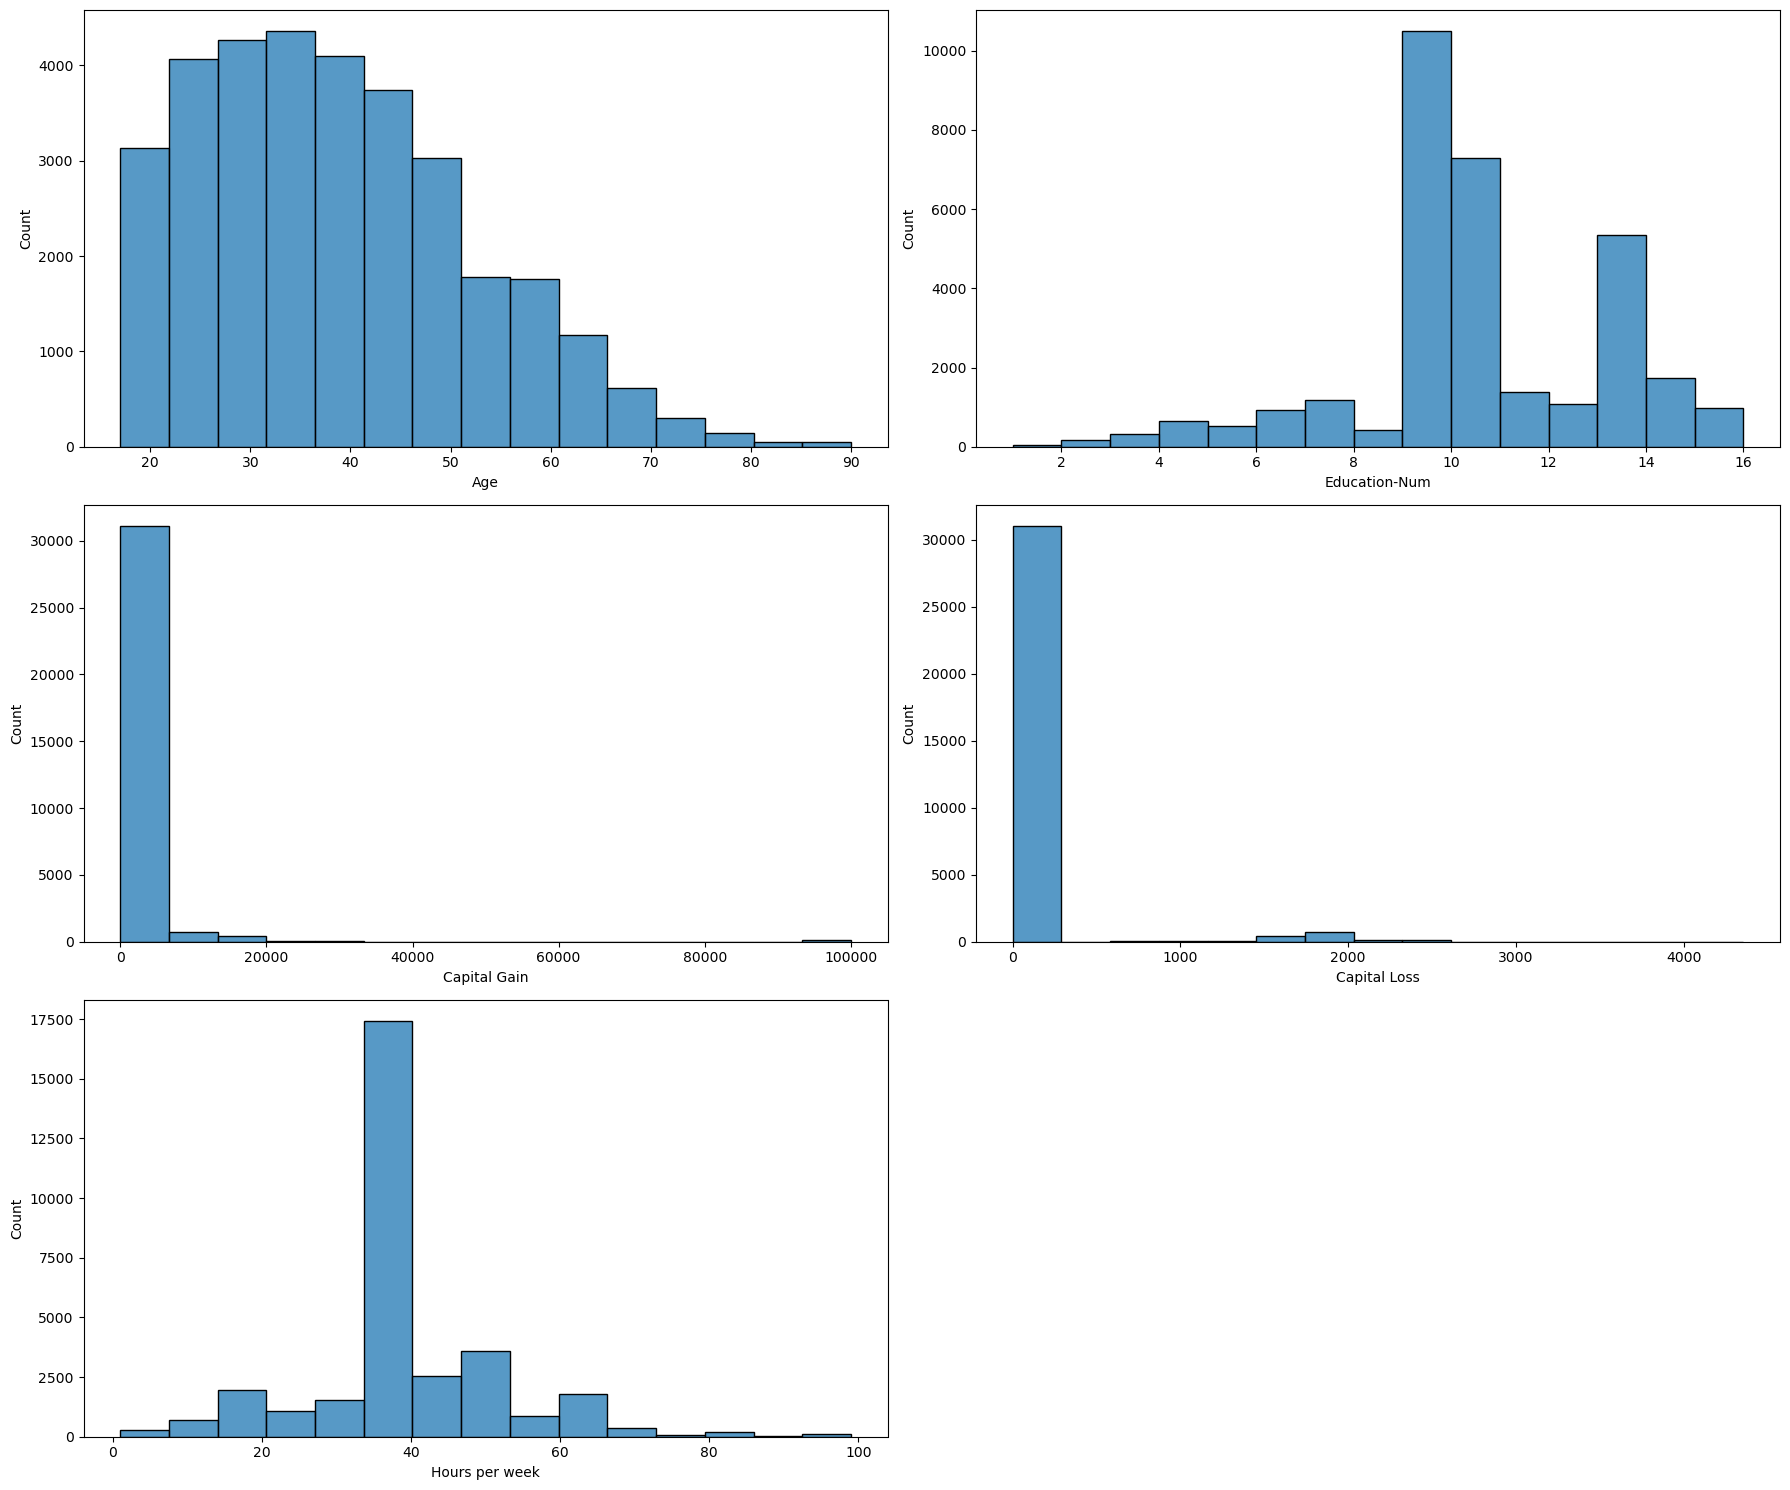

In [14]:
fig, axes = plt.subplots(3, 2,figsize=(18, 15))

for i, col in enumerate(list(numerical_features_df.columns.values)):
    plot = sns.histplot(ax=axes.flatten()[i], x = numerical_features_df[col], bins = 15)

fig.delaxes(axes[2,1])
plt.tight_layout() 

As none of the distributions are normal (the only one, that is at least symetrical is "Hours per week"), we can not use mean and standard deviation to detect outliers.

1. Let's first identify and investigate **age outliers** and try to analize if they are reasonable. As the distribution is right-skewed, the outliers can be counted by the following rule:  
Q3 +1.5(IQR)

The value from formula meets the value from the box-plot: 78

In [15]:
age_Q3 = np.percentile(df['Age'], [75])[0]
age_IQR = stats.iqr(df['Age'], interpolation = 'midpoint')

age_outlier_border = age_Q3 + 1.5*age_IQR

age_outliers = df[df['Age']>=age_outlier_border]
print(f'{age_outliers.shape[0]} datapoints with age >= {age_outlier_border}')
age_outliers.sample(10)

166 datapoints with age >= 78.0


,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
26012,81,?,106765,Some-college,10,Widowed,?,Unmarried,White,Female,0.0,0.0,4,United-States,<=50K
12830,81,Private,201398,Masters,14,Widowed,Prof-specialty,Unmarried,White,Male,0.0,0.0,60,?,<=50K
26731,84,Private,188328,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,0.0,16,United-States,<=50K
8381,85,Private,115364,HS-grad,9,Widowed,Sales,Unmarried,White,Male,0.0,0.0,35,United-States,<=50K
28948,81,Private,129338,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,10,United-States,<=50K
28721,80,Self-emp-not-inc,225892,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,1409.0,0.0,40,United-States,<=50K
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051.0,0.0,72,United-States,>50K
24238,90,?,166343,1st-4th,2,Widowed,?,Not-in-family,Black,Female,0.0,0.0,40,United-States,<=50K
22898,84,?,127184,5th-6th,3,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,20,United-States,<=50K
2684,78,Local-gov,136198,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,15,United-States,<=50K


Data looks pretty normal, all people have different levels of education, different marital status, occupation etc. Income also varies, but most of old people have it under 50k. Also, average working hours per week is 10h lower than in the whole dataset.

2. Let's now investigate Education-Num outliers and try to analize if they are reasonable.

It's hard to define the side of the skew, as there is a long tail to the left of the main quantity of points, but there is as well a big number of points with a bit higher value, than the mode. However on the box-plot we can see that outlier points start at the value of 4.

In [590]:
median = np.median(df['Education-Num'])
mean = np.mean(df['Education-Num']).round()
mode = stats.mode(df['Education-Num'], keepdims = False)[0]
print(median, mean, mode)

10.0 10.0 9


So, mode is slightly different from mean and median. Here we can apply the same rule of outliers identification as for the 'Age' attribute. 

In [591]:
edu_Q1 = np.percentile(df['Education-Num'], [25])[0]
edu_IQR = stats.iqr(df['Education-Num'], interpolation = 'midpoint')

edu_outlier_border = edu_Q1 - 1.5*edu_IQR

education_outliers = df[df['Education-Num']<= edu_outlier_border]
print(f'{education_outliers.shape[0]} datapoints with education from preschool level to 8th grade')
education_outliers.sample(5)

1198 datapoints with education from preschool level to 8th grade


,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
2159,47,Self-emp-not-inc,121124,5th-6th,3,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,Italy,>50K
32425,23,Private,180771,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Wife,Amer-Indian-Eskimo,Female,0,0,35,Mexico,<=50K
7920,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
19064,31,Private,109917,7th-8th,4,Separated,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
4012,35,Private,227571,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K


3. Let's check if we can apply (mean ± 3std) rule to the "Hours per week" variable:

In [592]:
median = np.median(df['Hours per week'])
mean = np.mean(df['Hours per week']).round()
mode = stats.mode(df['Hours per week'], keepdims = False)[0]
print(median, mean, mode)

40.0 40.0 40


As all 3 metrics are equal, however on the boxplot we can see that all the observations below ~ 33h and above ~52h are considered to be outliers. Let's calculate them here by IQR rule:

In [593]:
hpw_Q1 = np.percentile(df['Hours per week'], [25])[0]
hpw_Q3 = np.percentile(df['Hours per week'], [75])[0]
hpw_IQR = stats.iqr(df['Hours per week'], interpolation = 'midpoint')

hpw_low_border = hpw_Q1 - 1.5*hpw_IQR
hpw_low_outliers = df[df['Hours per week'] < hpw_low_border]

hpw_top_border = hpw_Q3 + 1.5*hpw_IQR
hpw_top_outliers = df[df['Hours per week'] > hpw_top_border]

hpw_low_outliers_over50k = hpw_low_outliers[hpw_low_outliers['Income'] == ' >50K']
hpw_top_outliers_over50k = hpw_top_outliers[hpw_top_outliers['Income'] == ' >50K']

print(f'{hpw_low_outliers.shape[0]} datapoints with {hpw_low_border} working hours per week or less, and only {hpw_low_outliers_over50k.shape[0]} of them earm more than 50k a year')
print(f'{hpw_top_outliers.shape[0]} datapoints with {hpw_top_border} working hours per week or more, and {hpw_top_outliers_over50k.shape[0]}(!!!) of them earm more than 50k a year')

hpw_low_outliers.sample(5)

5516 datapoints with 32.5 working hours per week or less, and only 381 of them earm more than 50k a year
3492 datapoints with 52.5 working hours per week or more, and 1453(!!!) of them earm more than 50k a year


,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
19206,17,Private,183066,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,<=50K
22616,23,State-gov,96748,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,10,United-States,<=50K
28476,71,?,116165,Some-college,10,Widowed,?,Not-in-family,White,Female,0,0,14,Canada,<=50K
13159,35,Private,70447,Some-college,10,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,4650,0,20,United-States,<=50K
25585,50,Private,240612,HS-grad,9,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0,0,10,United-States,<=50K


In [594]:
hpw_top_outliers.sample(5)

,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
3866,54,Private,22743,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,15024,0,60,United-States,>50K
9295,36,Private,215373,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,70,United-States,<=50K
23519,46,Local-gov,303918,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,7688,0,96,United-States,>50K
24173,27,Private,176683,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,<=50K
27341,21,Private,176486,HS-grad,9,Married-spouse-absent,Exec-managerial,Other-relative,White,Female,0,0,60,United-States,<=50K


For the sake of readability, I showed just 5 examples of outliers from each border. But if we'll check it carefully, it's easy to notice, that a lot of observations under the lower border have no values in Workclass and Occupation columns. 
Those, who work a lot, tend to have a good education and be busy mostly in private or be self-employed. Also ~41% of them have income >=50k, compared to only ~7% of those under the lower border. As we'll be able to see later, in the whole dataset this value equals to 24%.

Beyond the lower border there are more women, while beyond the top - men.

Let's see how each variable influences the target. For this purpose our numerical variables, hued by level of income, can be plotted

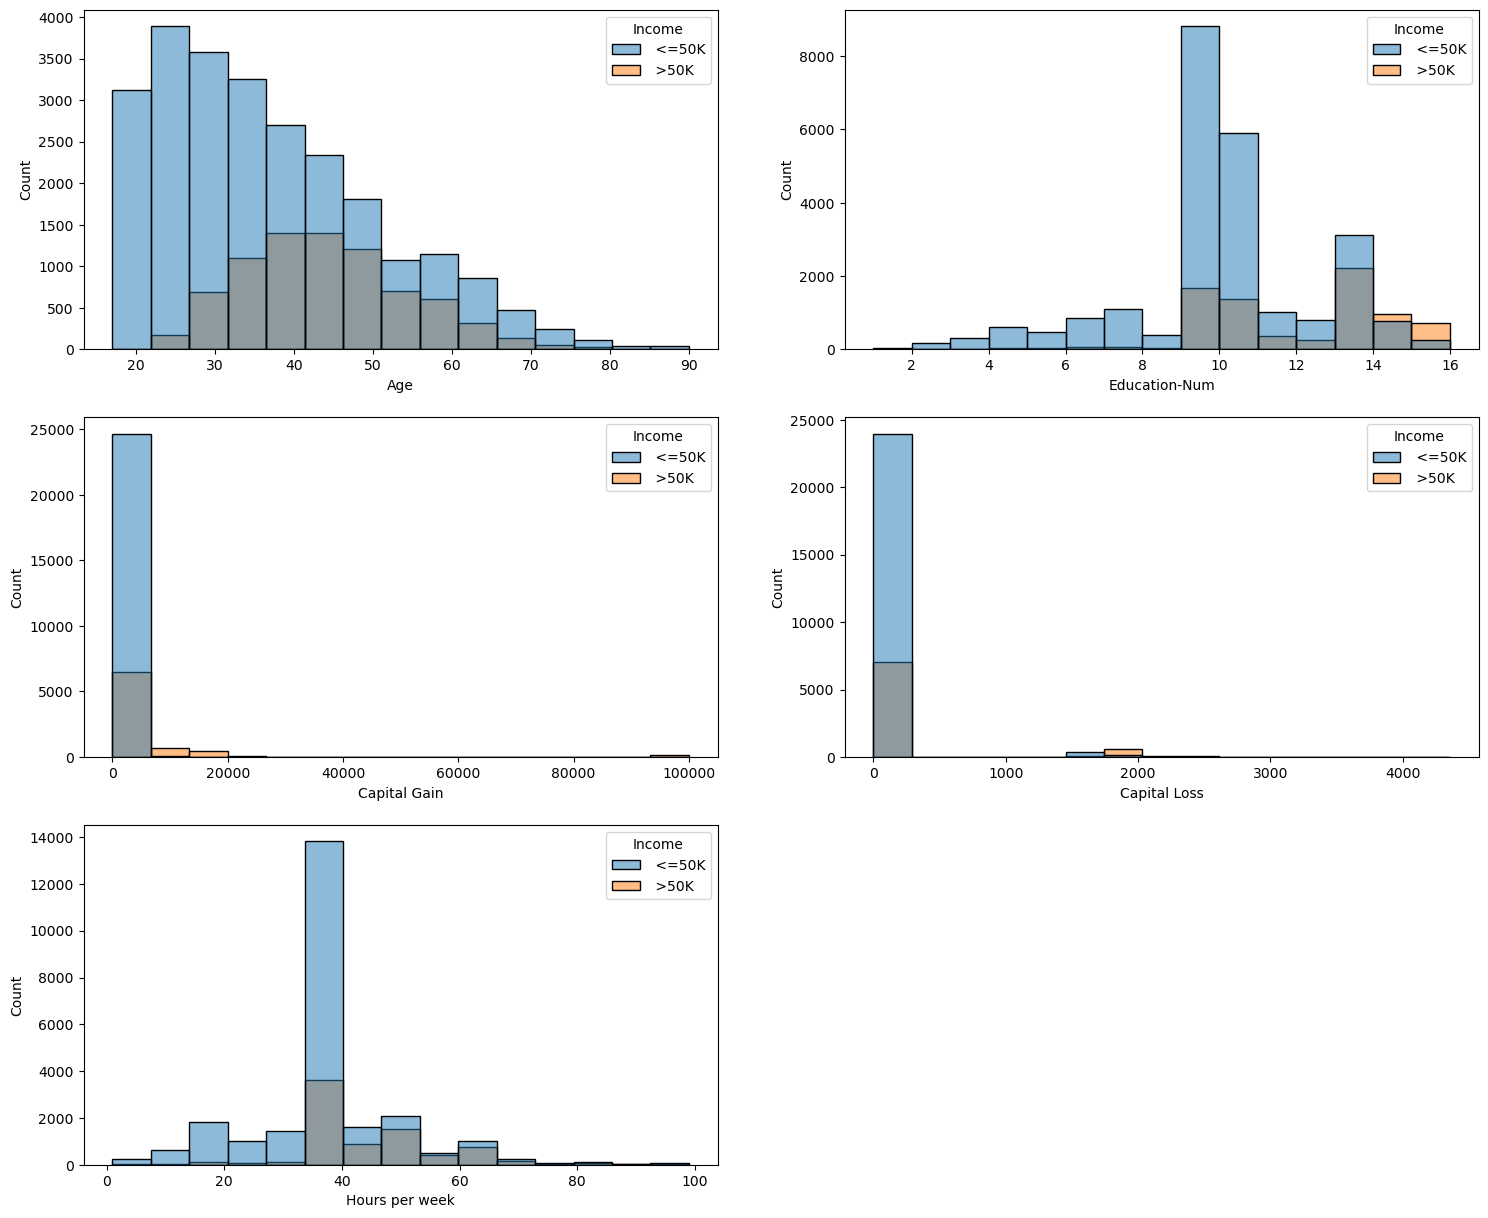

In [595]:
fig, axes = plt.subplots(3, 2,figsize=(18, 15))

for i, col in enumerate(list(numerical_features_df.columns.values)):
    sns.histplot(ax = axes.flatten()[i], x = df[col], hue = df["Income"], bins = 15)

fig.delaxes(axes[2,1])

## Categorical variables analysis

Here chi2 test was applied to categorical features.

In [596]:
def get_observed_crosstab(col:str):
    cross_tab = pd.crosstab(df[col], df['Income'], margins = True)
    rows_names = list(df[col].unique())
    rows_names.append('col_totals')

    cross_tab.columns = ['>50K', '<=50K', 'row_totals']
    cross_tab.index = rows_names

    observed = cross_tab.iloc[0:-1,0:-1]
    return observed

In [597]:
for col in df.columns:
    if col == 'Income':
        break
    if df[col].dtypes == 'object':
        print(col)
        observed = get_observed_crosstab(col)
        chi_2, p, dof, expected = scipy.stats.chi2_contingency(observed)
        chi_2 = chi_2.round(2)
        print(f'chi2 stat = {chi_2}\np-value = {p}')
        print(f'Statistically significant: {p<0.05}\n')

Workclass
chi2 stat = 1045.71
p-value = 2.026505431120716e-220
Statistically significant: True

Education
chi2 stat = 4429.65
p-value = 0.0
Statistically significant: True

Marital Status
chi2 stat = 6517.74
p-value = 0.0
Statistically significant: True

Occupation
chi2 stat = 4031.97
p-value = 0.0
Statistically significant: True

Relationship
chi2 stat = 6699.08
p-value = 0.0
Statistically significant: True

Ethnic group
chi2 stat = 330.92
p-value = 2.305960610160958e-70
Statistically significant: True

Sex
chi2 stat = 1517.81
p-value = 0.0
Statistically significant: True

Country
chi2 stat = 317.23
p-value = 2.2113858852543023e-44
Statistically significant: True



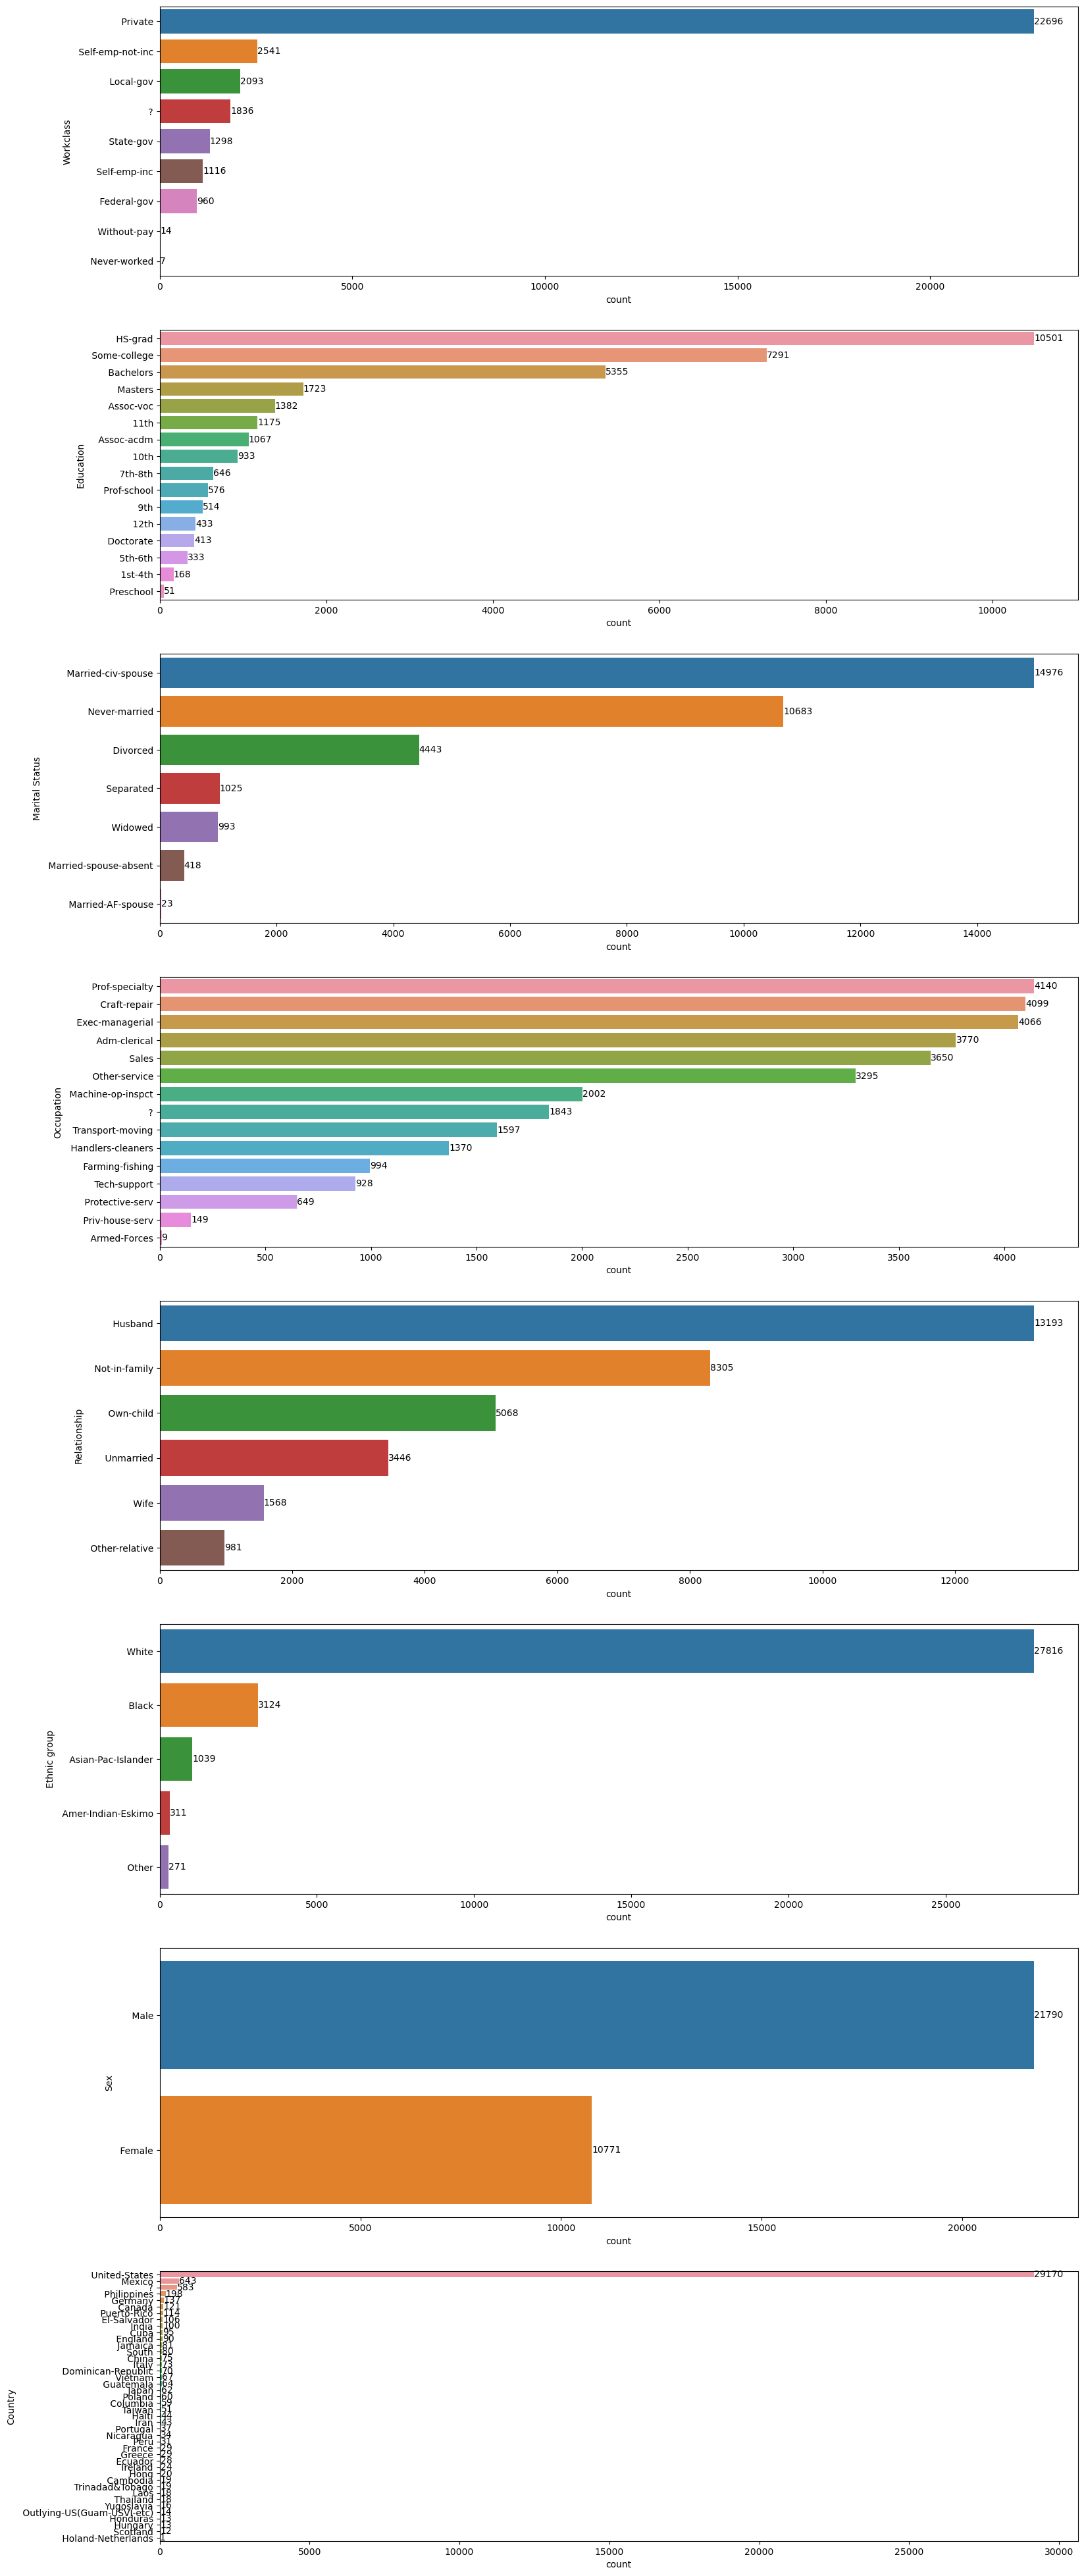

In [598]:
# Lets check unique values and their counts of non-numerical variables
i=0
fig, axes = plt.subplots(8, 1, figsize=(18, 50))

for col in df.columns:
    if col == 'Income':
        break
    if df[col].dtypes == 'object':
        abs_values = df[col].value_counts().values
        
        ax = sns.countplot(ax = axes[i], 
                           y = df[col], 
                           order = df[col].value_counts().index)
        ax.bar_label(container=ax.containers[0], labels=abs_values)
        i+=1

**Note**: 
Number of records with unknown(' ?') ocupation =  (Num of rec with unknown work class) + (Num of rec with 'Never worked' work class), which is pretty logical. 

I will keep the missing values so far for futher investigation.

Let's make sure, the equation above is true

In [599]:
df[df['Workclass']==' Never-worked']

,Age,Workclass,final weight,Education,Education-Num,Marital Status,Occupation,Relationship,Ethnic group,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


All 7 values of ' Never-worked' class also have ' ?' values of ocupation. We are going to need this rows in order to predict later, that all not working people have income of less than 50k per year.

Also there is missing data in 'native country' column, which we will also keep so far.

Now let's check the number of rows, that have at least one **missing value**:

In [600]:
n_rows_with_missing_vlues = df.loc[(df['Occupation'] == ' ?') | (df['Country'] == ' ?')].shape[0]
n_rows_with_missing_vlues

2399

Let's check the **distribution of the target variable**

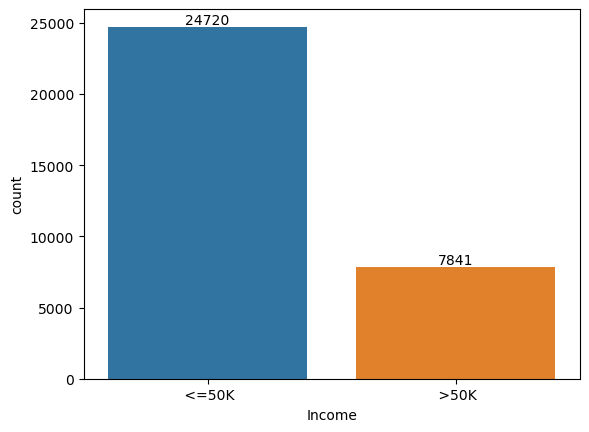

In [601]:
abs_values = df['Income'].value_counts().values
ax = sns.countplot(x = df['Income'])
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

Let's check the **distribution of the categorical independent variables**

In [37]:
categorical_features_df = df[['Workclass', 
                              'Education', 
                              'Marital Status', 
                              'Occupation', 
                              'Relationship', 
                              'Ethnic group', 
                              'Sex', 
                              'Country']]

Let's plot our categorical variables, hued by level of income

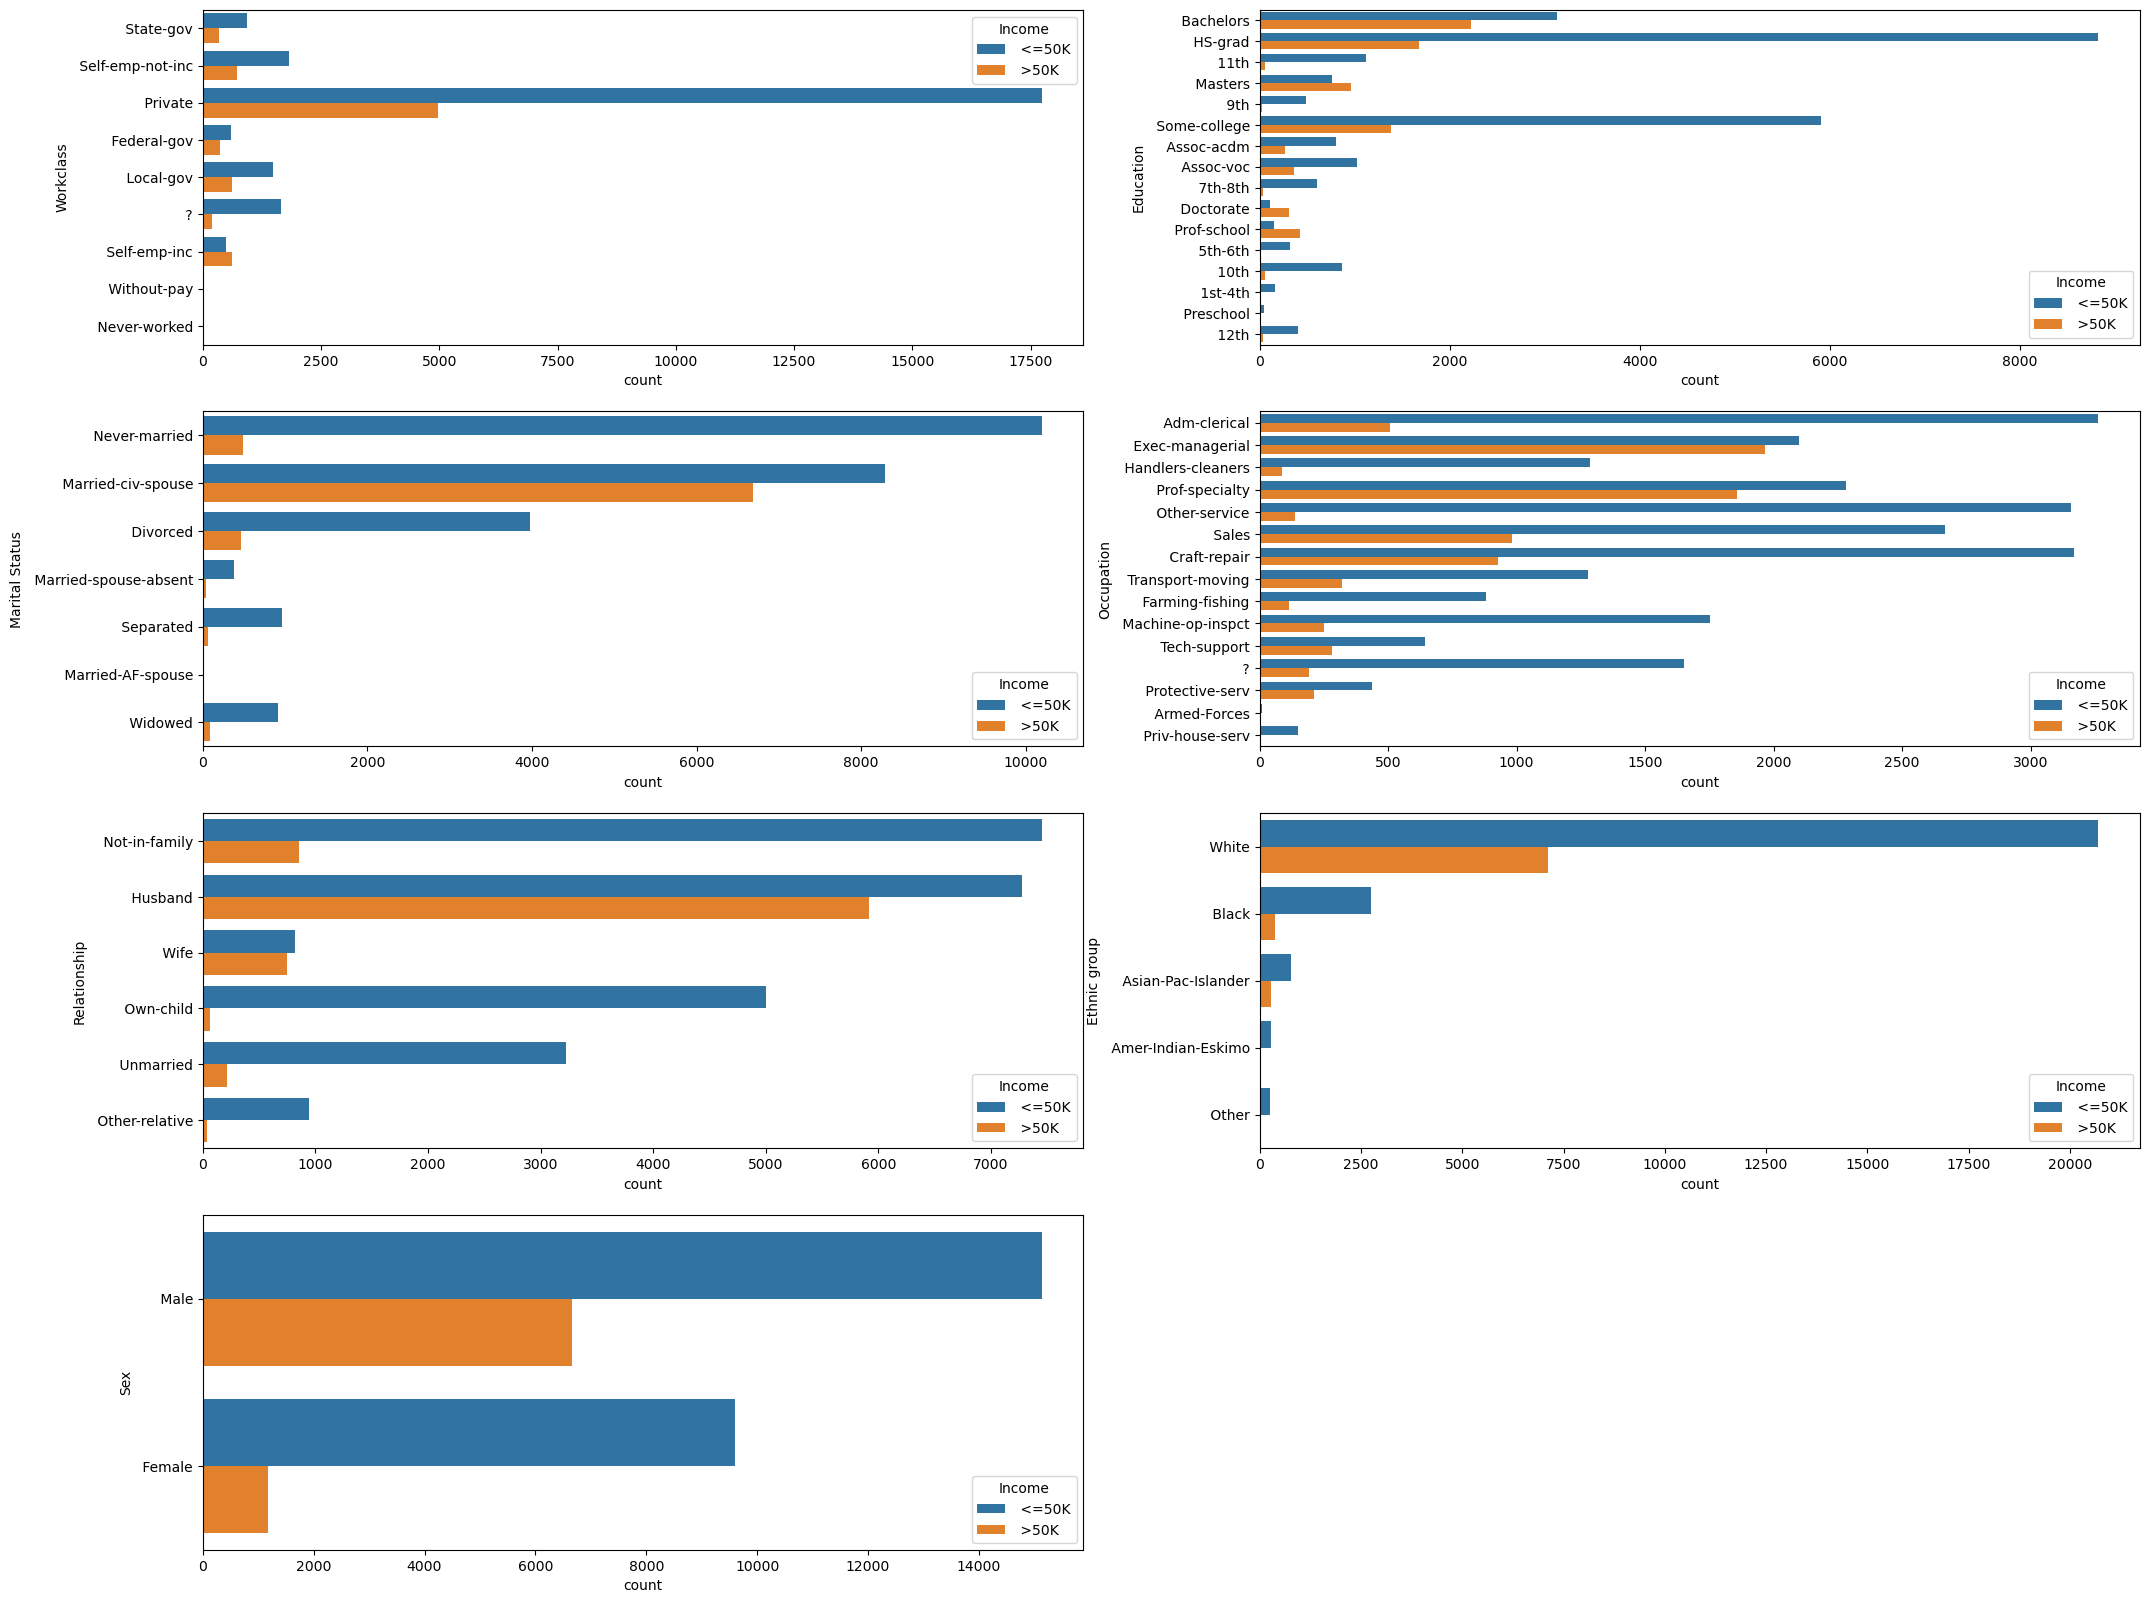

In [603]:
fig, axes = plt.subplots(4, 2,figsize=(25, 20))

for i, col in enumerate(list(categorical_features_df.columns.values)):
    sns.countplot(ax = axes.flatten()[i], y=df[col], hue=df["Income"])

fig.delaxes(axes[3,1])

According to EDA some draft **conclusions** can be made:
- dataset is strongly imbalanced
- there is no strong positive or negative correlation between numerical variables
- income does not depend on final weight according to t-test, but
- income does depend on the rest of categorical and numeric variables. For example, ratio of women earning >50k to women earning >= 50k is much lower than the same ratio for men
- it is also pretty interesting, that families without kids earn more. Look at the ratio of 'husband' and 'wife' classes compared to 'one child' or 'unmarried'. Those, who only have a spouse, are divided almost 50/50 by level of income, while there are very few percents of people having a child or being unmarried and earning >50k

The following list of featues is considered to be statistically significant:
1. Age
2. Workclass
3. Education
4. Marital Status
5. Occupation
6. Relationship
7. Ethnic group
8. Sex
9. Capital Gain
10. Capital Loss
11. Hours per week
12. Country